***Airport Data Visualizations***

Team members   *1.Nirja Rajeev*                         *2.Sarvesh Kulkarni*
               *3.Saket Pitale*                         *4.Satheesh M K*


The project uses the International Airports Dataset, offering a comprehensive overview of global airports.These are the dataset highlights:

**airports.csv** (Columns: ID, Identifier, Type, Name, Latitude, Longitude, Elevation, Continent, Country, Region, City, Scheduled Service, GPS Code, IATA Code, Local Code)

**countries.csv** (Columns: Index, Country Code, Country Name, Continent)

**navaids.csv** (Columns: ID, Filename, Identifier, Name, Type, Frequency, Latitude, Longitude, Elevation, Country, Magnetic Variation, Usage Type, Power, Associated Airport)

**regions.csv** (Columns: ID, Code, Local Code, Name, Continent, Country)

**runways.csv** (Columns: ID, Airport ID, Airport Code, Length, Width, Surface, Lighted, Closed, Runway End)



In [23]:
#IMPORTING ALL NECESSARY PACKAGES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [24]:
#lOADING THE 5 CSV FILES
airports = pd.read_csv("C:/Satheesh/PycharmProjects/G507_Python/Python Project/Data/airports.csv")
countries = pd.read_csv("C:/Satheesh/PycharmProjects/G507_Python/Python Project/Data/countries.csv")
navaids = pd.read_csv("C:/Satheesh/PycharmProjects/G507_Python/Python Project/Data/navaids.csv")
regions = pd.read_csv("C:/Satheesh/PycharmProjects/G507_Python/Python Project/Data/regions.csv")
runways = pd.read_csv("C:/Satheesh/PycharmProjects/G507_Python/Python Project/Data/runways.csv")

In [25]:
#CHECKING FOR NULL VALUES IN AIRPORTS DATASET
airports.shape
print(airports.isnull().sum())


id                       0
ident                    0
type                     0
name                     0
latitude_deg             0
longitude_deg            0
elevation_ft         14398
continent            36995
iso_country            259
iso_region               0
municipality          5051
scheduled_service        0
gps_code             35020
iata_code            67476
local_code           43576
Unnamed: 15          76364
Unnamed: 16          76364
Unnamed: 17          76364
dtype: int64




***We Can see 3 unnamed columns with null data, so we can drop these columns as they are of no use.***



In [26]:
#DROPPING EMPTY COLUMNS FROM THE AIRPORTS DATASET
cleaned_airports =airports.drop(columns=[col for col in airports.columns if 'Unnamed' in col])
cleaned_airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76364 entries, 0 to 76363
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 76364 non-null  int64  
 1   ident              76364 non-null  object 
 2   type               76364 non-null  object 
 3   name               76364 non-null  object 
 4   latitude_deg       76364 non-null  float64
 5   longitude_deg      76364 non-null  float64
 6   elevation_ft       61966 non-null  float64
 7   continent          39369 non-null  object 
 8   iso_country        76105 non-null  object 
 9   iso_region         76364 non-null  object 
 10  municipality       71313 non-null  object 
 11  scheduled_service  76364 non-null  object 
 12  gps_code           41344 non-null  object 
 13  iata_code          8888 non-null   object 
 14  local_code         32788 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 8.7+ MB


In [27]:
#CHECKING FOR NULL VALUES IN NAVAIDS DATASET
navaids.shape
print(navaids.isnull().sum())
navaids.shape

id                           0
filename                     0
ident                       13
name                         0
type                         0
frequency_khz                0
latitude_deg                 0
longitude_deg                0
elevation_ft              3851
iso_country                 15
magnetic_variation_deg       8
usageType                   27
power                       27
associated_airport        3637
dtype: int64


(11020, 14)

In [28]:
#CHECKING FOR NULL VALUES IN REGIONS DATASET
print(regions.isnull().sum())
regions.shape

id               0
code             0
local_code       4
name             0
continent      433
iso_country     15
dtype: int64


(3910, 6)

In [29]:
#CHECKING FOR NULL VALUES IN COUNTRIES DATASET
countries.shape
print(countries.isnull().sum())
countries.shape

Unnamed: 0     0
code           1
name           0
continent     41
dtype: int64


(248, 4)

In [30]:
#CHECKING FOR NULL VALUES IN RUNWAYS DATASET
runways.shape
print(runways.isnull().sum())
runways.shape

id                  0
airport_ref         0
airport_ident       0
length_ft         255
width_ft         2911
surface           484
lighted             0
closed              0
le_ident          194
dtype: int64


(45077, 9)

In [31]:
#DROPPING ROWS WITH EMPTY 'WIDTH' AND 'HEIGHT' COLUMNS
clean_runways=runways.dropna(subset=['width_ft','length_ft'])
clean_runways.isnull().sum()

id                 0
airport_ref        0
airport_ident      0
length_ft          0
width_ft           0
surface          163
lighted            0
closed             0
le_ident         156
dtype: int64

In [32]:
#ADDING AREA COLUMN AS THE PRODUCT OF WIDTH_FT AND lENGTH_FT
clean_runways['area']=clean_runways['width_ft']*clean_runways['length_ft']
clean_runways.sort_values('area', ascending=False)
clean_runways

C:\Users\jayas\AppData\Local\Temp\ipykernel_22012\718252614.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



id  airport_ref airport_ident  length_ft  width_ft   surface  \
0      269408         6523           00A       80.0      80.0    ASPH-G   
1      255155         6524          00AK     2500.0      70.0      GRVL   
2      254165         6525          00AL     2300.0     200.0      TURF   
3      506792       506791          00AN     4517.0      60.0       GVL   
4      270932         6526          00AR       40.0      40.0     GRASS   
...       ...          ...           ...        ...       ...       ...   
45070  235188        27242          ZYTL    10827.0     148.0       CON   
45072  235186        27243          ZYTX    10499.0     148.0       CON   
45073  235169        27244          ZYYJ     8530.0     148.0       CON   
45075  346789       346788       ZZ-0003     1800.0      15.0      Turf   
45076  313663       313629          ZZZZ     1713.0      82.0  concrete   

       lighted  closed le_ident       area  
0            1       0       H1     6400.0  
1            0       0        N   175000.0  
2            0       0        1   460000.0  
3            0       0        3   271020.0  
4            0       0       H1     1600.0  
...        ...     ...      ...        ...  
45070        1       0       10  1602396.0  
45072        1       0        6  1553852.0  
45073        1       0        9  1262440.0  
45075        0       0       15    27000.0  
45076        0       0       18   140466.0  

[42161 rows x 10 columns]

**VISUALIZATION 1**


***Finding the airports with the largest area of runways which are lighted***



In [33]:
#FILTERING OUT LIGHTED RUNWAYS, THEN SORTING THEM IN DESCENDING ORDER
clean_runways_lighted=clean_runways[clean_runways['lighted']==1].sort_values('area',ascending=False)
#MERGING WITH ORIGINAL DATA TO GET THE NAMES OF THE AIRPORTS FROM ITS ID
merged_ap_rw=pd.merge(cleaned_airports,clean_runways, how='inner', left_on='id',right_on='airport_ref' )
merged_ap_rw=merged_ap_rw[merged_ap_rw['lighted']==1].sort_values('area',ascending=False).head(5)

#DISPLAYING THE RESULT
merged_ap_rw[['id_x','name','area','lighted']]



id_x                                               name        area  \
19374   18708                      Ridgeland-Claude Dean Airport  29715000.0   
40939   45902                             Skid Row Seaplane Base  20000000.0   
11709  507237  Western Sydney International Airport (under co...  18961118.0   
39552   26407                             Ulyanovsk East Airport   5298492.0   
24564   21230              NASA Shuttle Landing Facility Airport   4500000.0   

       lighted  
19374        1  
40939        1  
11709        1  
39552        1  
24564        1

**VISUALIZATION 2**


***Finding the airports with the smallest area of runways which are unlighted***



In [34]:
#FILTERING OUT NOT LIGHTED RUNWAYS, THEN SORTING THEM IN ASCENDING ORDER
merged_ap_rw=pd.merge(cleaned_airports,clean_runways, how='inner', left_on='id',right_on='airport_ref' )

#MERGING WITH ORIGINAL DATA TO GET THE NAMES OF THE AIRPORTS FROM ITS ID
merged_ap_rw=merged_ap_rw[merged_ap_rw['area'] != 0].sort_values('area',ascending=True).head(5)


#DISPLAYING THE RESULT
merged_ap_rw[['id_x','name','type','area','lighted']]

id_x                        name           type   area  lighted
2719     8935         Blanchette Heliport       heliport   64.0        0
38491  325407  Green Valley Farms Airport  small_airport  100.0        0
26702   21771     Congamond Lake Heliport       heliport  100.0        0
28414   23016      Weston Street Heliport       heliport  100.0        0
8730    14214    Digital (Box 2) Heliport       heliport  100.0        0

**VISUALIZATION 3**


***Countries with most airports***

This wordcloud reflects the most repeated country names (technically the country names with more number of airports will be displayed in a larger font)


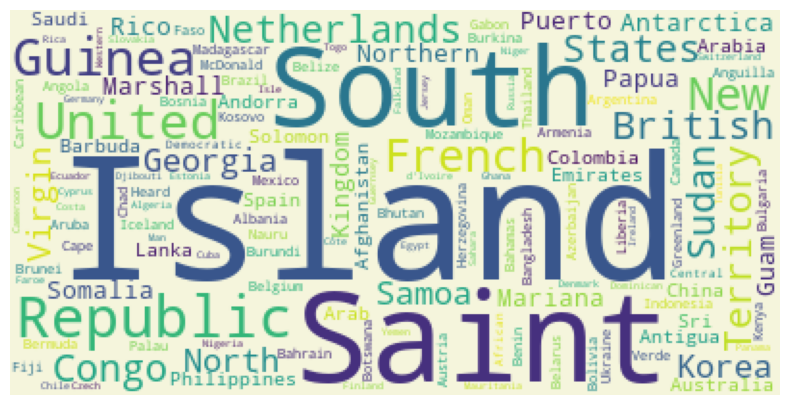

In [35]:
#WORDCLOUD FOR MOST AIRPORTS IN ALL COUNTRIES
from wordcloud import WordCloud
merged_ap_ct=pd.merge(cleaned_airports,countries,how='inner',left_on='iso_country',right_on='code')
airports_per_country=merged_ap_ct.groupby('name_y')['id'].count()
df=merged_ap_ct.drop_duplicates('name_y')
place = ' '.join(df['name_y'])
wordcloud = WordCloud(background_color='beige').generate(place)
plt.figure(figsize=(16, 5))
plt.imshow(wordcloud)
plt.axis('off')  # to turn off the axis values
plt.show()


***Conclusion:' ISLAND ', 'SAINT','South' are the most used words in the countries.***


**VISUALIZATION 4**

***Navigational aids (nav aids) in airports are systems, technologies, and tools that assist pilots, air traffic controllers, and ground personnel in ensuring safe and efficient airport operations. These aids play a crucial role in guiding aircraft during takeoff, landing, taxiing, and en route navigation.***


***Importance of Navigational Aids in Airports***

*Safety*: Prevents accidents during landing, takeoff, and taxiing, especially under poor visibility.

*Efficiency*: Reduces delays by optimizing aircraft movement on the ground and in the air.

*Capacity Management*: Enables high-volume airports to handle more aircraft effectively.

*Reduced Environmental Impact*: Systems like PBN help reduce unnecessary fuel burn and noise pollution


***Good navaids generally have low frequency and high power.***


In [36]:
#TAKING THE LEAST 1000 FREQUENCIES WITH 'HIGH POWER'
# such Navigational aids are currently the most secure and safe way to guide landings
navaid_high_power_low_freq=navaids[navaids['power']=='HIGH'].sort_values('frequency_khz').head(1000)
navaid_high_power_low_freq=navaid_high_power_low_freq[['type']].value_counts()

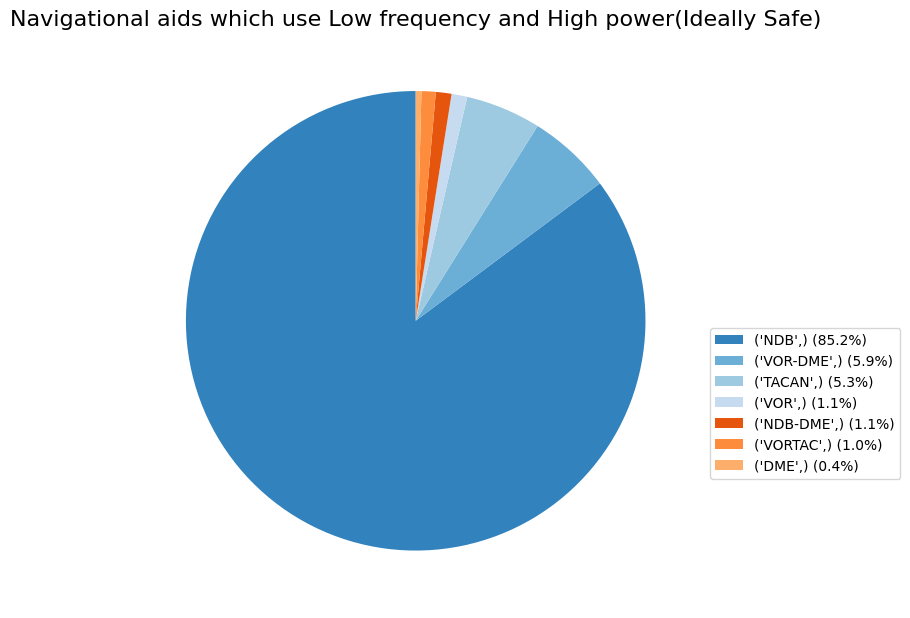

In [37]:
plt.figure(figsize=(8, 8))
# Calculate the percentage values
total = sum(navaid_high_power_low_freq)
percentages = [(value / total) * 100 for value in navaid_high_power_low_freq]

# Create labels with percentages for the legend
legend_labels = [
    f"{label} ({percentage:.1f}%)"
    for label, percentage in zip(navaid_high_power_low_freq.index, percentages)
]
# Create the pie chart without any percentages in the slices
plt.pie(
    navaid_high_power_low_freq,
    labels=None,  # Remove slice labels
    startangle=90,
    colors=plt.cm.tab20c.colors
)
# Add a legend with labels and percentages
plt.legend(legend_labels, loc="best", bbox_to_anchor=(1, 0.5))

# Add a title
plt.title('Navigational aids which use Low frequency and High power(Ideally Safe)', fontsize=16)
plt.tight_layout()
plt.show()


***Conclusion: NDBs can be considered the most safe Navaids are the currently widely used across all airports in the world***




**VISUALIZATION 5**


***World Map with airports depicted by how elevated they are.***




In [38]:
bins = [-float('inf'), 0, 1000, 5000, 10000, float('inf')]
labels = ['Below Sea Level', '0-1000 ft', '1001-5000 ft', '5001-10000 ft', 'Above 10000 ft']
cleaned_airports['elevation_category'] = pd.cut(cleaned_airports['elevation_ft'], bins=bins, labels=labels)


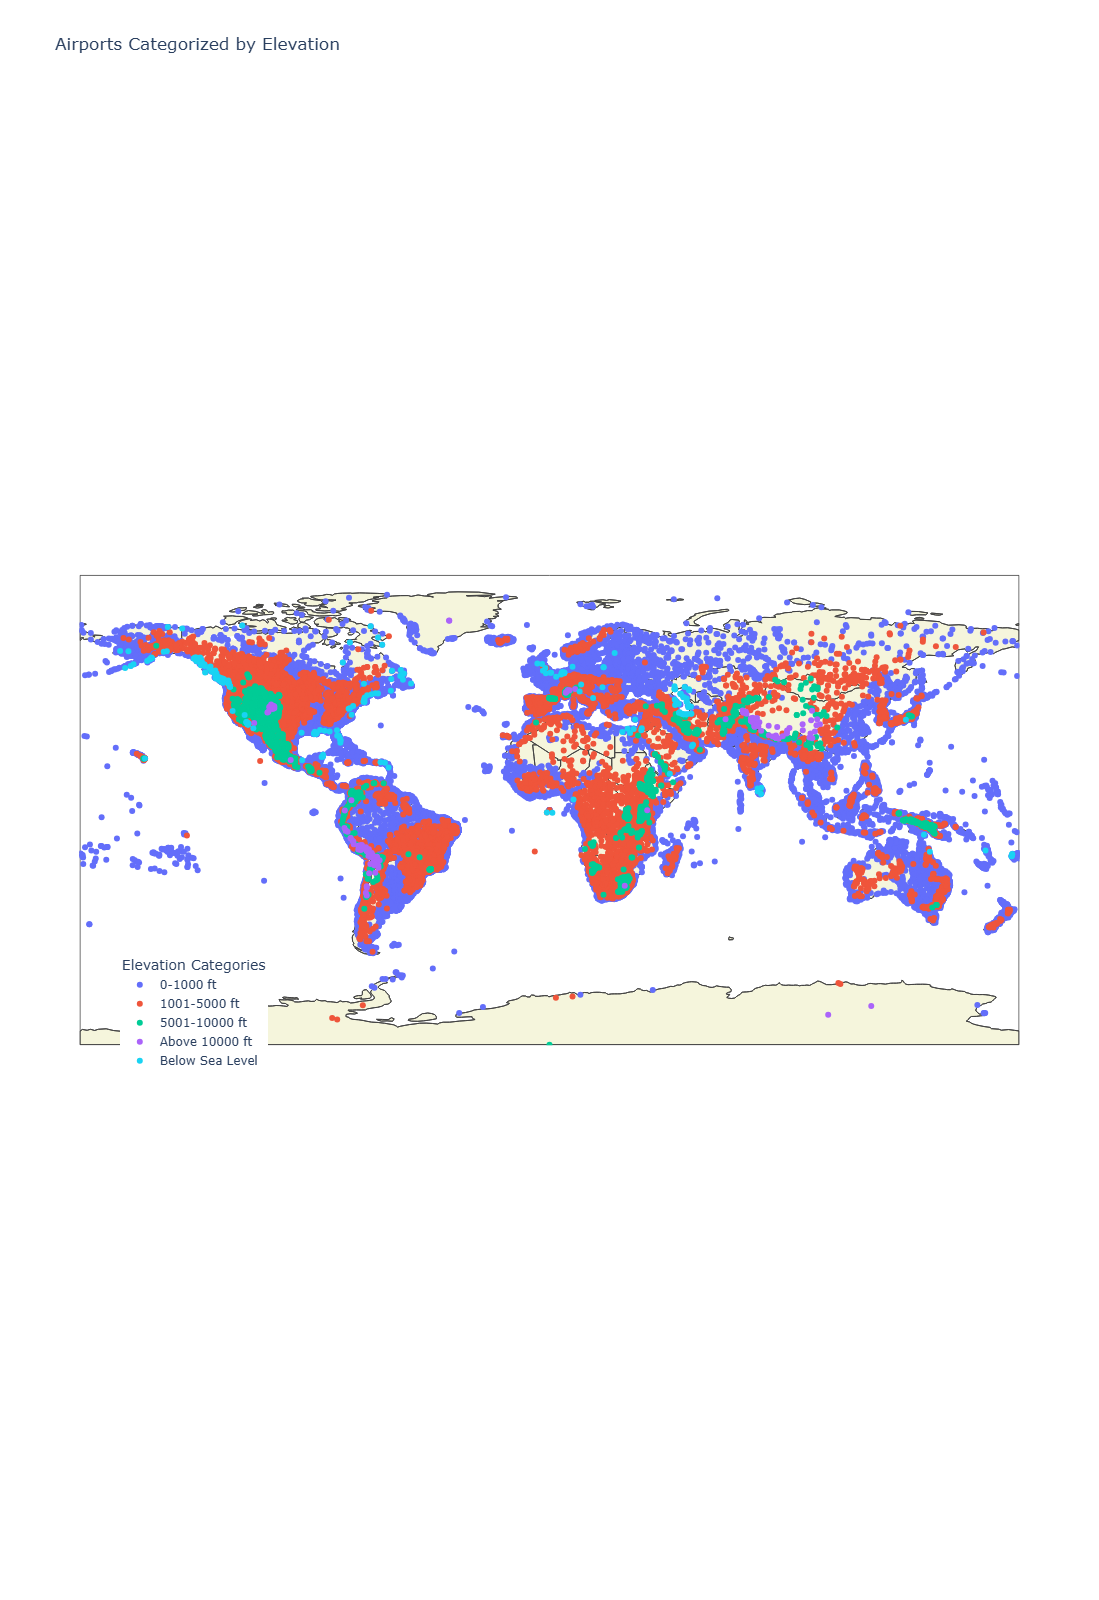

In [39]:
# Create the scatter plot
globe = px.scatter_geo(
    cleaned_airports,
    lat='latitude_deg',
    lon='longitude_deg',
    color='elevation_category',
    title="Airports Categorized by Elevation",
    labels={'elevation_category': 'Elevation Range'},
)
# Customize layout
globe.update_layout(
    geo=dict(
        showcountries=True,
        showland=True,
        landcolor='rgb(245, 245, 220)'
    ),
    width=1600,
    height=1600,
# Additional legend customization
    legend_title_text='Elevation Categories',
    legend=dict(
        yanchor="top",
        y=0.4,
        xanchor="right",
        x=0.2
    )
)
globe.show()


**VISUALIZATION 6**

***India Map***

**Visualizing airports spread across India**


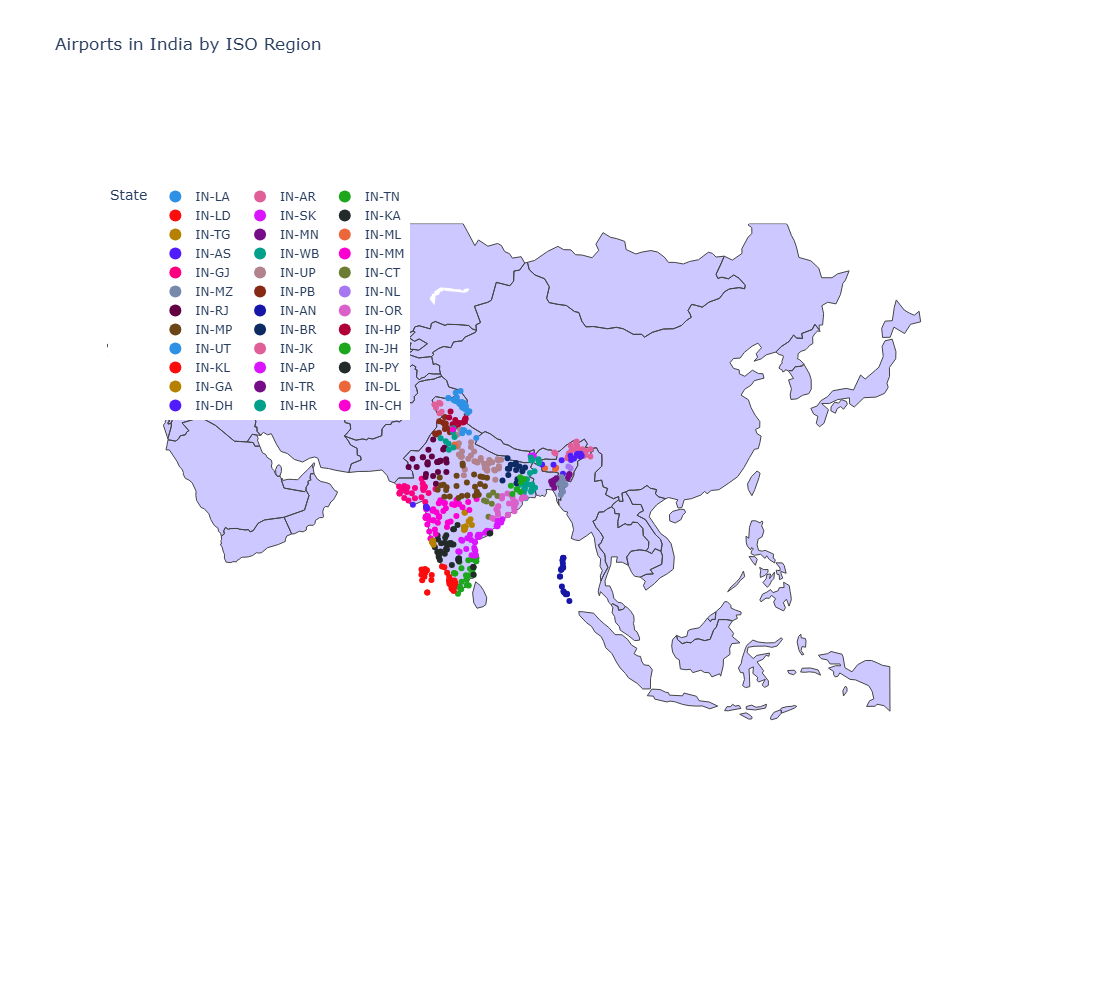

In [40]:
filtered_airports = cleaned_airports[cleaned_airports['iso_country'] == 'IN']

globe = px.scatter_geo(
    filtered_airports,
    lat='latitude_deg',
    lon='longitude_deg',
    color='iso_region',
    title="Airports in India by ISO Region",
    color_discrete_sequence=px.colors.qualitative.Dark24
)

globe.update_layout(
    geo=dict(
        showcountries=True,
        showland=True,
        scope='asia',  # Focus on Asia
        landcolor='rgb(205, 200, 255)'
    ),
    width=1600,
    height=1000,
    legend_title_text='State',
    legend=dict(
        yanchor="top",
        y=0.9,
        xanchor="left",
        x=0.1,
        orientation="h",
        traceorder="normal",
        itemsizing="constant",
        tracegroupgap=0,
    )
)
globe.show()


**VISUALIZATION 7**


***Most elevated airports in the world***


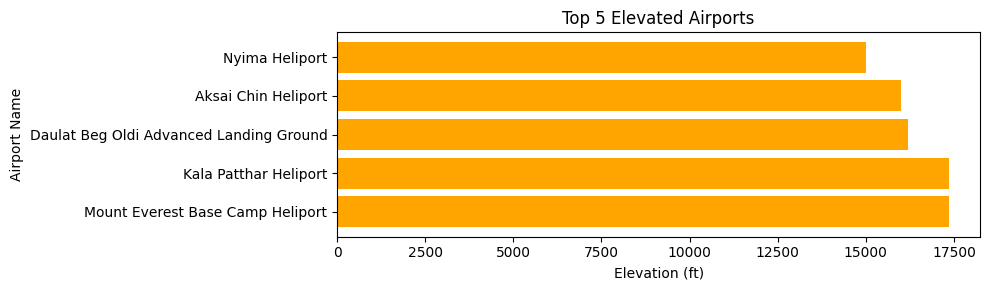

In [41]:

elevated_airports=merged_ap_ct.sort_values(by='elevation_ft',ascending=False).head(5)
elevated_airports_for_graph = elevated_airports[['name_x', 'type', 'name_y', 'elevation_ft']]
# Select specific columns for the graph
selected_columns = elevated_airports_for_graph[['name_x', 'elevation_ft']]

# Plot the bar graph
plt.figure(figsize=(10, 3))
plt.barh(selected_columns['name_x'], selected_columns['elevation_ft'], color='orange')

# Add labels and title
plt.xlabel('Elevation (ft)')
plt.ylabel('Airport Name')
plt.title('Top 5 Elevated Airports')

# Show the graph
plt.tight_layout()
plt.show()


***Conclusion: Mount Everest Base Camp Heliport and Kala Patthar Heliport are the highest elevated airports in the world with approx 17500 ft***


**VISUALIZATION 8**


***Countries with the most number of airports, differentied by type of airports***


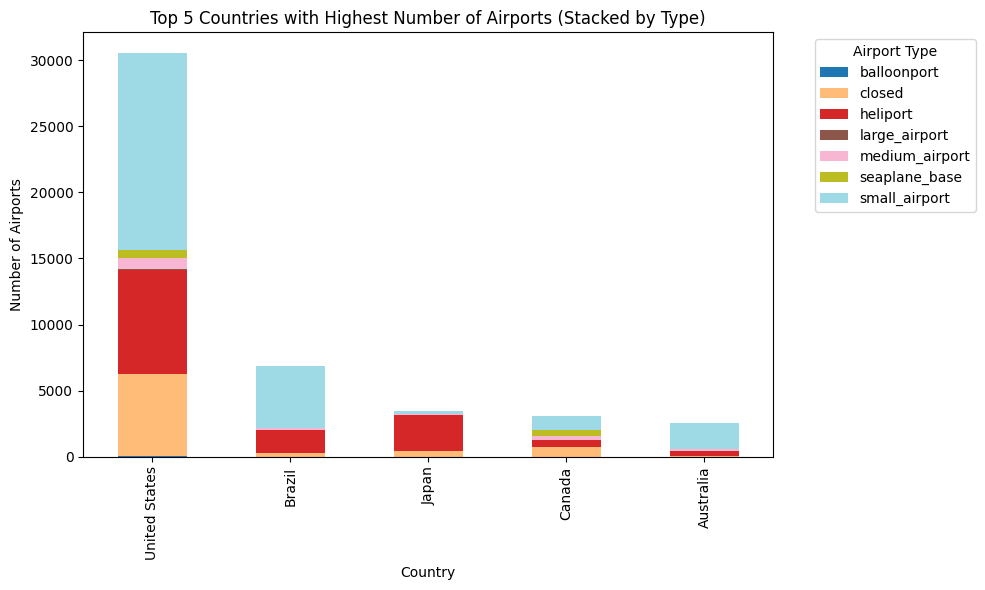

In [42]:

#Top 5 countries with maximum number of airports and then in those top five countries, 
#type of airports-- Stacked bar graph
airport_counts = merged_ap_ct.groupby(['name_y', 'type']).size().unstack(fill_value=0)

#Calculate total airports and sort by top 5 countries
airport_counts['total'] = airport_counts.sum(axis=1)
top_countries = airport_counts.nlargest(5, 'total')

stacked_data = top_countries.drop(columns=['total'])

stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

plt.xlabel('Country')
plt.ylabel('Number of Airports')
plt.title('Top 5 Countries with Highest Number of Airports (Stacked by Type)')
plt.legend(title='Airport Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



***Conclusion:US has the maximum number of airports,mostly comprising of small airports.***




**VISUALIZATION 9**


***Correlating elevation of airport with its runway length.***


Key Factors Linking Runway Length and Elevation:
1. Air Density and Altitude:
At higher elevations, air density decreases (lower air pressure), Aircrafts need longer distances to accelerate to takeoff speed or decelerate during landing.

2. Temperature Amplification (High-Altitude Airports):
Hot and High Conditions: Airports at higher elevations often experience higher temperatures. Warm air further reduces density, exacerbating performance issues.



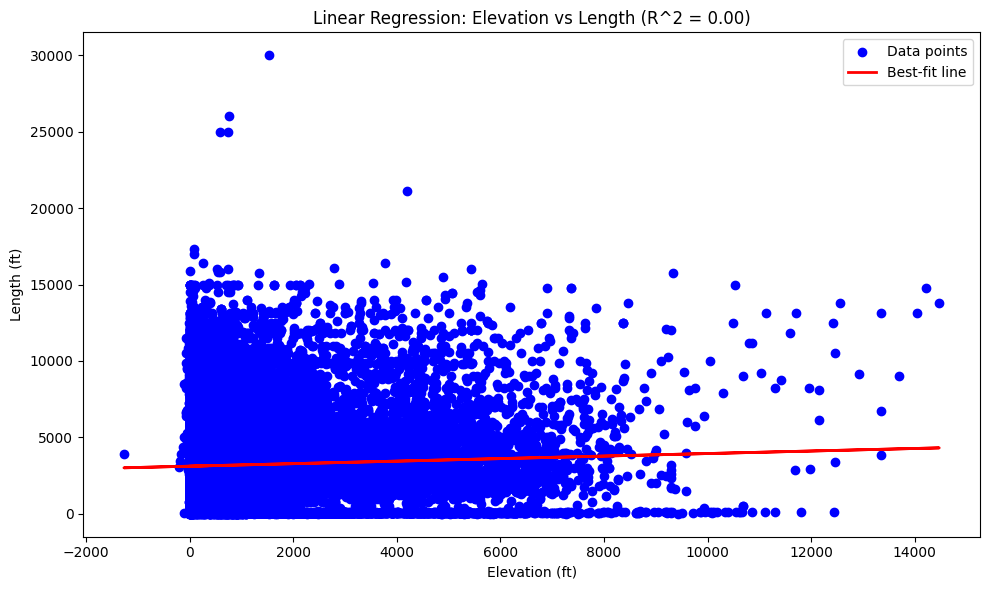

In [43]:

# Airports at higher elevations typically need longer runways due to reduced air density.(use regression to find the relationship between length and elevation, find r2 value) -- Regression / line chart

#Can we say that the length of runways depends on the airport's elevation? That is, can we confirm that the airports with high elevations have long runways?
#For this we will perform a regression between the two variables and try to find a relation. 

merged_ap_rw_1=pd.merge(cleaned_airports,clean_runways, how='inner', left_on='id',right_on='airport_ref' )
df_regre = merged_ap_rw_1[['elevation_ft', 'length_ft']]
df_regre = df_regre.dropna()
X = df_regre[['elevation_ft']]  # Independent variable (elevation_ft)
y = df_regre['length_ft']  # Dependent variable (length_ft)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate the R-squared value
r2 = r2_score(y, y_pred)

# Plotting the data points and the best-fit line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')  # Scatter plot of original data
plt.plot(X, y_pred, color='red', linewidth=2, label='Best-fit line')  # Best-fit line
plt.xlabel('Elevation (ft)')
plt.ylabel('Length (ft)')
plt.title(f'Linear Regression: Elevation vs Length (R^2 = {r2:.2f})')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

 


***Conclusion:From the above graph, we can confirm that our assumption was wrong since the R^2 value is 0***




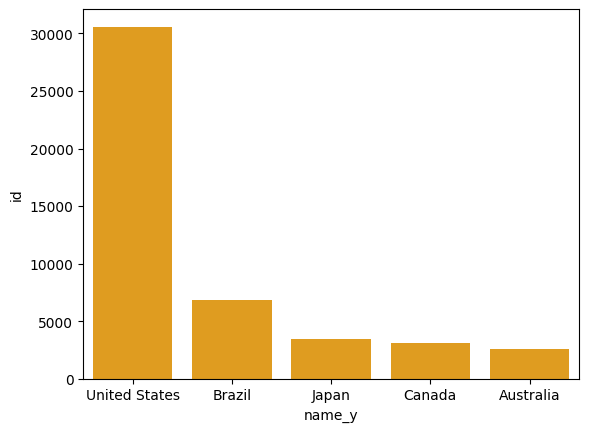

In [45]:
#Top 5 countries with most number of airports
airports_per_country=merged_ap_ct.groupby('name_y')['id'].count()
airports_per_country = airports_per_country.reset_index()
airports_per_country=pd.DataFrame(airports_per_country)
top_countries=airports_per_country.sort_values(by='id',ascending=False).head(5)
top_countries
sns.barplot(top_countries,x='name_y',y='id', color='orange')
plt.show()